## Imports

In [4]:
import pandas as pd
import numpy as np
from time import perf_counter
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from multiprocessing.pool import ThreadPool as Pool
import matplotlib.pyplot as plt
import plotnine as p9
import seaborn as sns

## Load in data

In [5]:
df = pd.read_csv('./Concrete_Data.csv')
col_names = ['c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'age', 'strength']
df.columns = col_names
df

c1     c2     c3     c4    c5      c6     c7  age  strength
0     540.0    0.0    0.0  162.0   2.5  1040.0  676.0   28     79.99
1     540.0    0.0    0.0  162.0   2.5  1055.0  676.0   28     61.89
2     332.5  142.5    0.0  228.0   0.0   932.0  594.0  270     40.27
3     332.5  142.5    0.0  228.0   0.0   932.0  594.0  365     41.05
4     198.6  132.4    0.0  192.0   0.0   978.4  825.5  360     44.30
...     ...    ...    ...    ...   ...     ...    ...  ...       ...
1025  276.4  116.0   90.3  179.6   8.9   870.1  768.3   28     44.28
1026  322.2    0.0  115.6  196.0  10.4   817.9  813.4   28     31.18
1027  148.5  139.4  108.6  192.7   6.1   892.4  780.0   28     23.70
1028  159.1  186.7    0.0  175.6  11.3   989.6  788.9   28     32.77
1029  260.9  100.5   78.3  200.6   8.6   864.5  761.5   28     32.40

[1030 rows x 9 columns]

## Exploratory Data Analysis

In [68]:
df.describe()

c1           c2           c3           c4           c5  \
count  1030.000000  1030.000000  1030.000000  1030.000000  1030.000000   
mean    281.167864    73.895825    54.188350   181.567282     6.204660   
std     104.506364    86.279342    63.997004    21.354219     5.973841   
min     102.000000     0.000000     0.000000   121.800000     0.000000   
25%     192.375000     0.000000     0.000000   164.900000     0.000000   
50%     272.900000    22.000000     0.000000   185.000000     6.400000   
75%     350.000000   142.950000   118.300000   192.000000    10.200000   
max     540.000000   359.400000   200.100000   247.000000    32.200000   

                c6           c7          age     strength  
count  1030.000000  1030.000000  1030.000000  1030.000000  
mean    972.918932   773.580485    45.662136    35.817961  
std      77.753954    80.175980    63.169912    16.705742  
min     801.000000   594.000000     1.000000     2.330000  
25%     932.000000   730.950000     7.000000    23.710000  
50%     968.000000   779.500000    28.000000    34.445000  
75%    1029.400000   824.000000    56.000000    46.135000  
max    1145.000000   992.600000   365.000000    82.600000

In [66]:
df.isna().sum()

c1          0
c2          0
c3          0
c4          0
c5          0
c6          0
c7          0
age         0
strength    0
dtype: int64

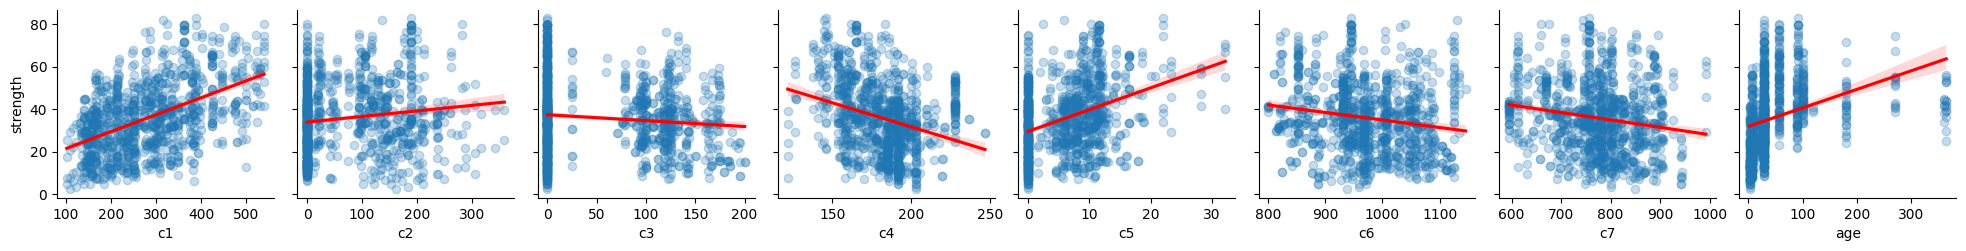

In [30]:
sns.pairplot(df, y_vars = col_names[-1], x_vars = col_names[:-1], kind = 'reg', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.25}})

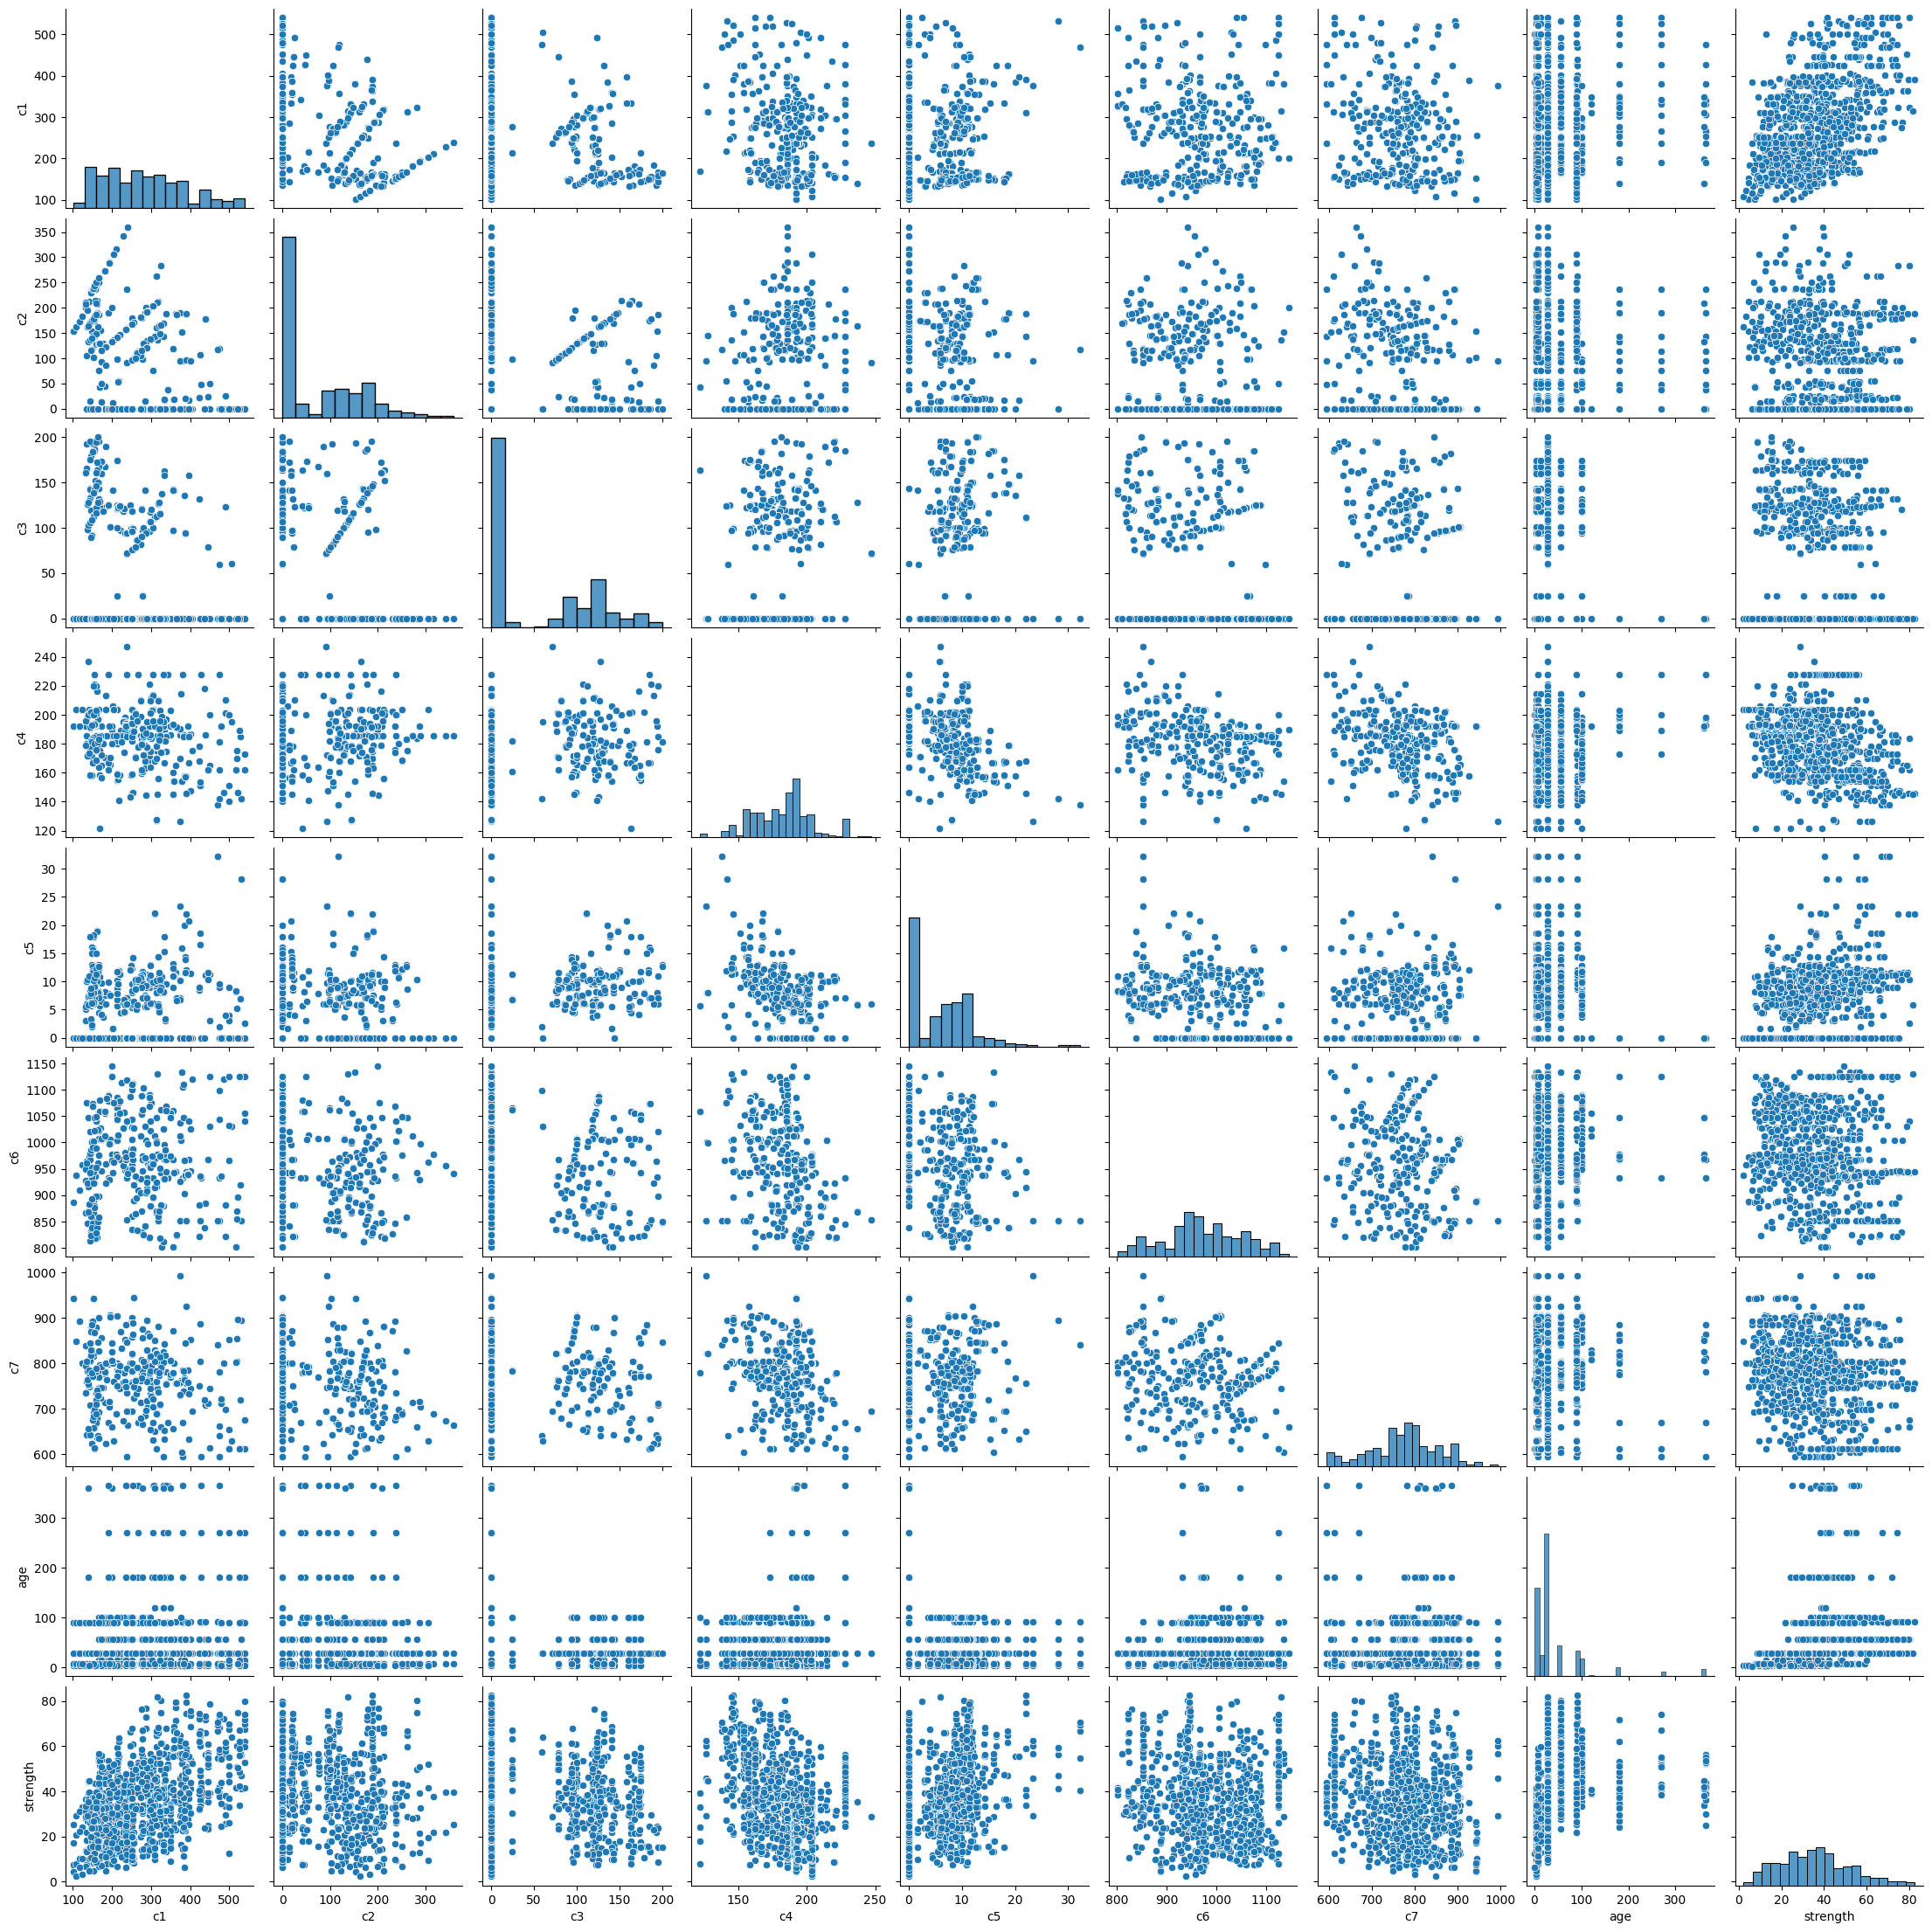

In [51]:
sns.pairplot(df)

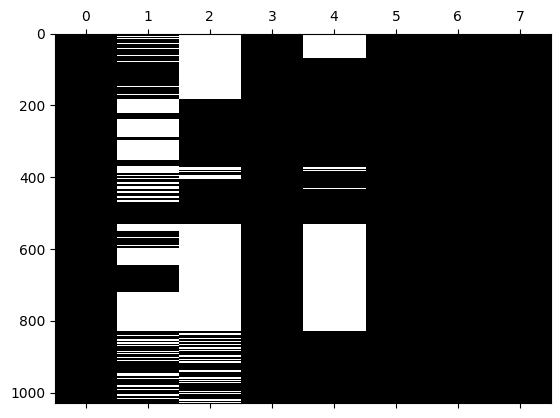

In [23]:
plt.spy(X, aspect='auto')

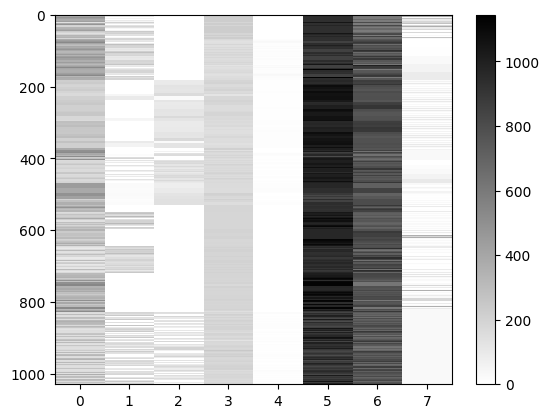

In [25]:
plt.imshow(X,interpolation='none',cmap='binary', aspect='auto')
plt.colorbar()

## Data Preprocessing

### Extract X and Y

In [24]:
df_n, df_m = df.shape

In [25]:
X = df.iloc[:, :-1].to_numpy()
Y = df.iloc[:, -1].to_numpy().reshape(df_n, 1)

In [26]:
X_n, X_m = X.shape

### Split into train and test subsets

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=156)

### Scale Data

In [9]:
X_scaler = preprocessing.StandardScaler().fit(X_train)
Y_scaler = preprocessing.StandardScaler().fit(Y_train)

X_scaled = X_scaler.transform(X_train)
Y_scaled = Y_scaler.transform(Y_train)

## Linear Regression

In [10]:
A = X_scaled.T @ X_scaled
b = X_scaled.T @ Y_scaled

In [29]:
A_n = A.shape[0]

In [58]:
A - np.diagflat(np.diag(A))

array([[   0.        , -224.05784383, -294.62139375,  -82.63667184,
          67.74298438,  -71.62955738, -171.65636236,   61.69395534],
       [-224.05784383,    0.        , -260.28498256,  110.94421918,
          16.25519983, -222.68592108, -222.18244709,  -44.58778977],
       [-294.62139375, -260.28498256,    0.        , -194.2853344 ,
         305.31507861,  -11.53389144,   70.89946309, -124.52288429],
       [ -82.63667184,  110.94421918, -194.2853344 ,    0.        ,
        -506.30152645, -149.1593262 , -358.64227221,  200.00999825],
       [  67.74298438,   16.25519983,  305.31507861, -506.30152645,
           0.        , -198.22719563,  175.04336876, -144.01966753],
       [ -71.62955738, -222.68592108,  -11.53389144, -149.1593262 ,
        -198.22719563,    0.        , -130.18621532,    4.0320899 ],
       [-171.65636236, -222.18244709,   70.89946309, -358.64227221,
         175.04336876, -130.18621532,    0.        ,  -96.99150346],
       [  61.69395534,  -44.58778977, -12

### Jacobi

In [62]:
def jacobi(A, b, x):
    
   D = np.diag(A)
   R = A - np.diagflat(D)

   i = 0
   while np.linalg.norm(A @ x - b) > 1e-3:
      i+= 1
      print(f'{i} | {A @ x - b}')
      print('######################################################')
      x = (b - np.dot(R, x)) / D

   return x

In [53]:
np.linalg.lstsq(A, b)[0]

C:\Users\cpy02\AppData\Local\Temp\ipykernel_21600\2623229246.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


array([[ 0.78880719],
       [ 0.5654493 ],
       [ 0.3618959 ],
       [-0.15467212],
       [ 0.11996473],
       [ 0.09794694],
       [ 0.12021513],
       [ 0.44065328]])

In [63]:
# initial guess
beta0 = np.full((A_n, 1), 1/A_n)

# run Jacobi algorithm
beta_hat_jacobi = jacobi(A, b, beta0)

1 | [[-388.98155367]
 [ -91.5385222 ]
 [ 113.8649345 ]
 [ 196.48733989]
 [-221.2317649 ]
 [ 124.63786461]
 [ 126.37785901]
 [-180.64257181]]
######################################################
2 | [[111.43387954 111.43387954 111.43387954 111.43387954 111.43387954
  111.43387954 111.43387954 111.43387954]
 [-36.19225004 -36.19225004 -36.19225004 -36.19225004 -36.19225004
  -36.19225004 -36.19225004 -36.19225004]
 [-81.25010976 -81.25010976 -81.25010976 -81.25010976 -81.25010976
  -81.25010976 -81.25010976 -81.25010976]
 [-15.32448398 -15.32448398 -15.32448398 -15.32448398 -15.32448398
  -15.32448398 -15.32448398 -15.32448398]
 [ 89.53993786  89.53993786  89.53993786  89.53993786  89.53993786
   89.53993786  89.53993786  89.53993786]
 [-57.38189341 -57.38189341 -57.38189341 -57.38189341 -57.38189341
  -57.38189341 -57.38189341 -57.38189341]
 [ 16.47251629  16.47251629  16.47251629  16.47251629  16.47251629
   16.47251629  16.47251629  16.47251629]
 [-32.78630826 -32.78630826 -32.78630

C:\Users\cpy02\AppData\Local\Temp\ipykernel_21600\3959467344.py:7: RuntimeWarning: overflow encountered in matmul
C:\Users\cpy02\AppData\Local\Temp\ipykernel_21600\3959467344.py:9: RuntimeWarning: overflow encountered in matmul
C:\Users\cpy02\AppData\Local\Temp\ipykernel_21600\3959467344.py:7: RuntimeWarning: invalid value encountered in matmul


In [34]:
beta_hat_jacobi

array([[ 3.47372987e+304],
       [ 9.83182773e+304],
       [-1.85369630e+305],
       [             inf],
       [            -inf],
       [ 1.11574120e+304],
       [-1.86308820e+305],
       [ 1.23420032e+305]])